In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sammyamajumdar","key":"8bed6789a501534ffe03f24b72485d0b"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 97% 526M/543M [00:06<00:00, 88.1MB/s]
100% 543M/543M [00:06<00:00, 89.2MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 78.5MB/s]
 98% 265M/271M [00:05<00:00, 28.5MB/s]
100% 271M/271M [00:05<00:00, 52.5MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "test1.zip"
with ZipFile(file_name) as zip:
    zip.extractall()
    print("Done extracting test set!")
file_name = "train.zip"
with ZipFile(file_name) as zip:
    zip.extractall()
    print("Done extracting train set!")

Done extracting test set!
Done extracting train set!


In [ ]:
import os, shutil
original_dataset_dir = "/content/train"
base_dir = "/content/"

train_dir = os.path.join(base_dir, "train_dir")
os.mkdir(train_dir)
validation_new_dir = os.path.join(base_dir, "validation_new_dir")
os.mkdir(validation_new_dir)
test_dir = "/content/test1" 

train_cats_dir = os.path.join(train_dir, "train_cats_dir")
os.mkdir(train_cats_dir)
validation_new_cats_dir = os.path.join(validation_new_dir, "validation_new_cats_dir")
os.mkdir(validation_new_cats_dir)

train_dogs_dir = os.path.join(train_dir, "train_dogs_dir")
os.mkdir(train_dogs_dir)
validation_new_dogs_dir = os.path.join(validation_new_dir, "validation_new_dogs_dir")
os.mkdir(validation_new_dogs_dir)

train_dir = "/content/train_dir"
validation_dir = "/content/validation_new_dir"
train_cats_dir = "/content/train_dir/train_cats_dir"
train_dogs_dir = "/content/train_dir/train_dogs_dir"
validation_cats_dir = "/content/validation_new_dir/validation_new_cats_dir"
validation_dogs_dir = "/content/validation_new_dir/validation_new_dogs_dir"

fname = [f"cat.{i}.jpg" for i in range(2500)]
for i in fname:
    try:
        src = os.path.join(original_dataset_dir, i)
        dst = os.path.join(validation_new_cats_dir, i)
        shutil.copyfile(src, dst)
    except:
        pass
fname2 = [f"cat.{j}.jpg" for j in range(2500,12500)]
for j in fname2:
    try:
        src = os.path.join(original_dataset_dir, j)
        dst = os.path.join(train_cats_dir, j)
        shutil.copyfile(src, dst)
    except:
        pass
fname3 = [f"dog.{i}.jpg" for i in range(2500)]
for k in fname3:
        src = os.path.join(original_dataset_dir, k)
        dst = os.path.join(validation_new_dogs_dir, k)
        shutil.copyfile(src, dst)
fname4 = [f"dog.{k}" for k in range(2500, 12500)]
for l in fname4:
        src = os.path.join(original_dataset_dir, l)
        dst = os.path.join(train_dogs_dir, l)
        shutil.copyfile(src, dst)

In [ ]:
print(len(os.listdir(train_dogs_dir)))
fname5 = [f"dog.{i}.jpg" for i in range(2501,12500)]
for l in fname5:
        src = os.path.join(original_dataset_dir, l)
        dst = os.path.join(train_dogs_dir, l)
        shutil.copyfile(src, dst)


In [ ]:
print(len(os.listdir(train_dogs_dir)))

9999


In [ ]:
test_dir = "/content/test1"
print(f"Total number of training examples : {len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir))}")
print(f"Total number of testing examples : {len(os.listdir(test_dir))}")
print(f"Total number of validation examples : {len(os.listdir(validation_new_cats_dir)) + len(os.listdir(validation_new_dogs_dir))}")

Total number of training examples : 19999
Total number of testing examples : 12500
Total number of validation examples : 5000


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
def create_model():
    network = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation = "relu", input_shape = (150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Conv2D(64, (3,3), activation = "relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Conv2D(64, (3,3), activation = "relu"),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(128, (3,3), activation = "relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation = "relu"),
        tf.keras.layers.Dense(256, activation = "relu"),
        tf.keras.layers.Dense(1, activation = "sigmoid")
    ])
    
    network.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
    return network
model = create_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  fill_mode = "nearest")
test_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    "/content/train_dir",
    target_size = (150,150),
    batch_size = 32,
    class_mode = "binary"
)
validation_generator = test_datagen.flow_from_directory(
    "/content/validation_new_dir",
    target_size = (150,150),
    batch_size = 32,
    class_mode = "binary"
)

Found 19999 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 256,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = 100
)

Epoch 1/50
256/256 [==============================] - 61s 240ms/step - loss: 0.6701 - accuracy: 0.5865 - val_loss: 0.6862 - val_accuracy: 0.5249
Epoch 2/50
256/256 [==============================] - 62s 240ms/step - loss: 0.6639 - accuracy: 0.5944 - val_loss: 0.6225 - val_accuracy: 0.6528
Epoch 3/50
256/256 [==============================] - 62s 242ms/step - loss: 0.6441 - accuracy: 0.6337 - val_loss: 0.5900 - val_accuracy: 0.7056
Epoch 4/50
256/256 [==============================] - 61s 239ms/step - loss: 0.6202 - accuracy: 0.6615 - val_loss: 0.6051 - val_accuracy: 0.6675
Epoch 5/50
256/256 [==============================] - 61s 239ms/step - loss: 0.6001 - accuracy: 0.6772 - val_loss: 0.5661 - val_accuracy: 0.7109
Epoch 6/50
256/256 [==============================] - 61s 237ms/step - loss: 0.5846 - accuracy: 0.6978 - val_loss: 0.5121 - val_accuracy: 0.7539
Epoch 7/50
256/256 [==============================] - 61s 237ms/step - loss: 0.5622 - accuracy: 0.7121 - val_loss: 0.5333 - val_ac

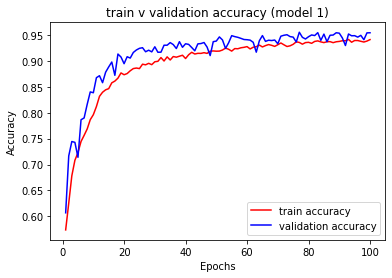

In [93]:
history_dict = history.history
train_loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
train_accuracy = history_dict["accuracy"]
val_accuracy = history_dict["val_accuracy"]
epochs = range(1, len(train_accuracy)+1)
# Accuracy Curve
plt.plot(epochs, train_accuracy, "r", label = "train accuracy")
plt.plot(epochs, val_accuracy, "b", label = "validation accuracy")
plt.title("train v validation accuracy (model 1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

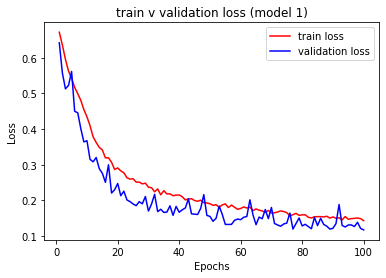

In [92]:
# Loss Curve
model.save("cats_and_dogs.h5")
plt.plot(epochs, train_loss, "r", label = "train loss")
plt.plot(epochs, val_loss, "b", label = "validation loss")
plt.title("train v validation loss (model 1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving cat (2).jpg to cat (2).jpg
Saving cat.jpg to cat.jpg
Saving cat3.jpg to cat3.jpg
Saving dog.jpg to dog.jpg
Saving dog2.jpg to dog2.jpg
Saving dog3.jpg to dog3.jpg
[1.]
cat (2).jpg is a dog
[1.]
cat.jpg is a dog
[0.]
cat3.jpg is a cat
[1.]
dog.jpg is a dog
[1.]
dog2.jpg is a dog
[1.]
dog3.jpg is a dog


##Training a fresh model (model2) with a different batch size. 

In [85]:
model2 = create_model() # using a freshly compiled model for another round of training.
train_datagen = ImageDataGenerator(rescale = 1/255,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  fill_mode = "nearest")
test_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    "/content/train_dir",
    target_size = (150,150),
    batch_size = 64,
    class_mode = "binary"
)
validation_generator = test_datagen.flow_from_directory(
    "/content/validation_new_dir",
    target_size = (150,150),
    batch_size = 50,
    class_mode = "binary"
)

history = model2.fit_generator(
    train_generator,
    steps_per_epoch = 256,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 100
)

Found 19999 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/100
256/256 [==============================] - 131s 513ms/step - loss: 0.6718 - accuracy: 0.5740 - val_loss: 0.6421 - val_accuracy: 0.6070
Epoch 2/100
256/256 [==============================] - 130s 509ms/step - loss: 0.6359 - accuracy: 0.6256 - val_loss: 0.5577 - val_accuracy: 0.7166
Epoch 3/100
256/256 [==============================] - 130s 507ms/step - loss: 0.5958 - accuracy: 0.6782 - val_loss: 0.5129 - val_accuracy: 0.7444
Epoch 4/100
256/256 [==============================] - 130s 509ms/step - loss: 0.5626 - accuracy: 0.7082 - val_loss: 0.5226 - val_accuracy: 0.7428
Epoch 5/100
256/256 [==============================] - 129s 505ms/step - loss: 0.5426 - accuracy: 0.7230 - val_loss: 0.5617 - val_accuracy: 0.7140
Epoch 6/100
256/256 [==============================] - 128s 501ms/step - loss: 0.5172 - accuracy: 0.7445 - val_loss: 0.4498 - val_accuracy: 0.7864
Epoch 7/100
256/256 [============

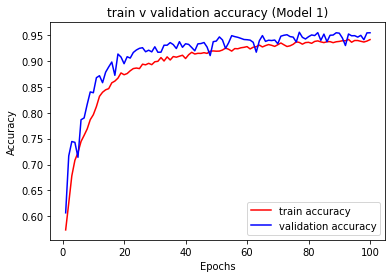

In [91]:
history_dict = history.history
train_loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
train_accuracy = history_dict["accuracy"]
val_accuracy = history_dict["val_accuracy"]
epochs = range(1, len(train_accuracy)+1)
# Accuracy Curve
plt.plot(epochs, train_accuracy, "r", label = "train accuracy")
plt.plot(epochs, val_accuracy, "b", label = "validation accuracy")
plt.title("train v validation accuracy (Model 1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

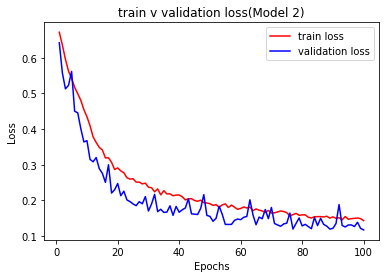

In [90]:
# Loss Curve
model.save("cats_and_dogs_v2.h5")
plt.plot(epochs, train_loss, "r", label = "train loss")
plt.plot(epochs, val_loss, "b", label = "validation loss")
plt.title("train v validation loss(Model 2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [89]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model2.predict(images)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving cat (2).jpg to cat (2) (2).jpg
Saving cat.jpg to cat (3).jpg
Saving cat3.jpg to cat3 (2).jpg
Saving dog.jpg to dog (2).jpg
Saving dog2.jpg to dog2 (2).jpg
Saving dog3.jpg to dog3 (2).jpg
[1.]
cat (2).jpg is a dog
[3.0173208e-09]
cat.jpg is a cat
[0.]
cat3.jpg is a cat
[1.]
dog.jpg is a dog
[1.]
dog2.jpg is a dog
[1.]
dog3.jpg is a dog
